In [1]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shap

In [2]:

tips = pd.read_csv("/content/tips.csv")

print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [3]:

# Select features (independent variables)
X = tips[['total_bill', 'size']]

# Select target variable (dependent variable)
y = tips['tip']

In [4]:

# Define your model (RandomForestRegressor in this case)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model on the training data
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [5]:
# Predict on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

MAE: 0.7367469387755099
MSE: 0.8342088880725631
RMSE: 0.9133503643578204
R-squared: 0.3326175906132479


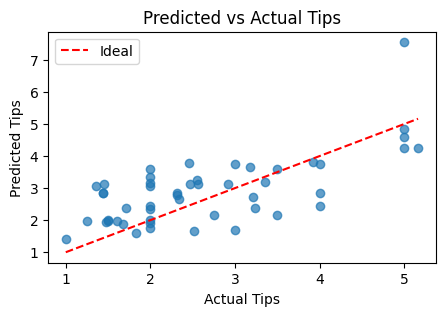

In [6]:
# Visualizing predictions vs actual values
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Ideal')
plt.xlabel("Actual Tips")
plt.ylabel("Predicted Tips")
plt.title("Predicted vs Actual Tips")
plt.legend()
plt.show()